<h1>R 무작정 따라하기 9</h1>
<hr>

In [1]:
library(UsingR)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [2]:
str(galton)

'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


In [3]:
help(galton)

galton {UsingR},R Documentation


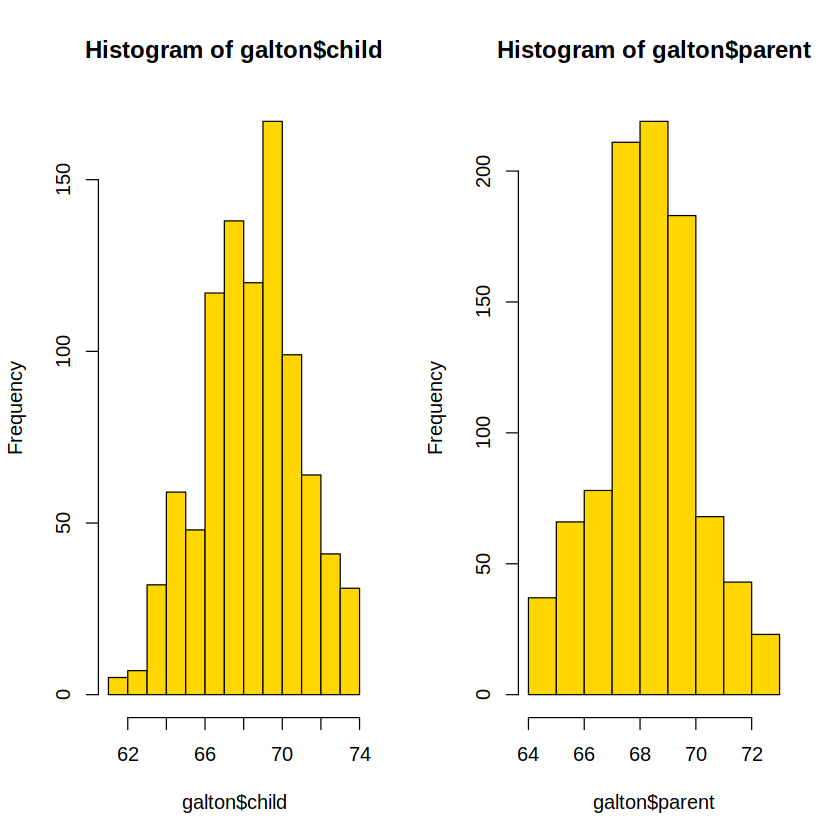

In [4]:
par(mfrow = c(1, 2))
hist(galton$child, col = 'gold', breaks = 10)
hist(galton$parent, col = 'gold', breaks = 10)

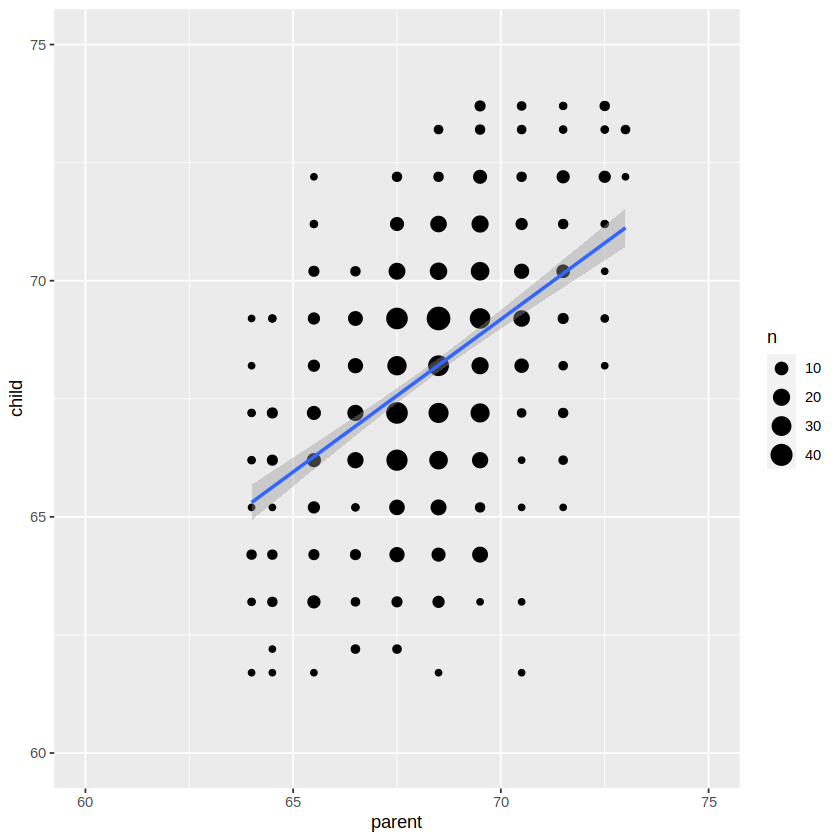

In [5]:
library(ggplot2)

p <- ggplot(galton, aes(parent, child))
p + geom_point() + geom_count() + xlim(c(60,75)) + ylim(c(60,75)) + geom_smooth(method='lm', formula='y ~ x')

In [6]:
x <- c(2, 3, 6, 4, 7, 4, 8, 6)
y <- c(8, 9, 18, 17, 21, 14, 27, 22)

df <- data.frame(cost = x, sales = y)
cor(df)

,cost,sales
cost,1.0000000,0.9550718
sales,0.9550718,1.0000000


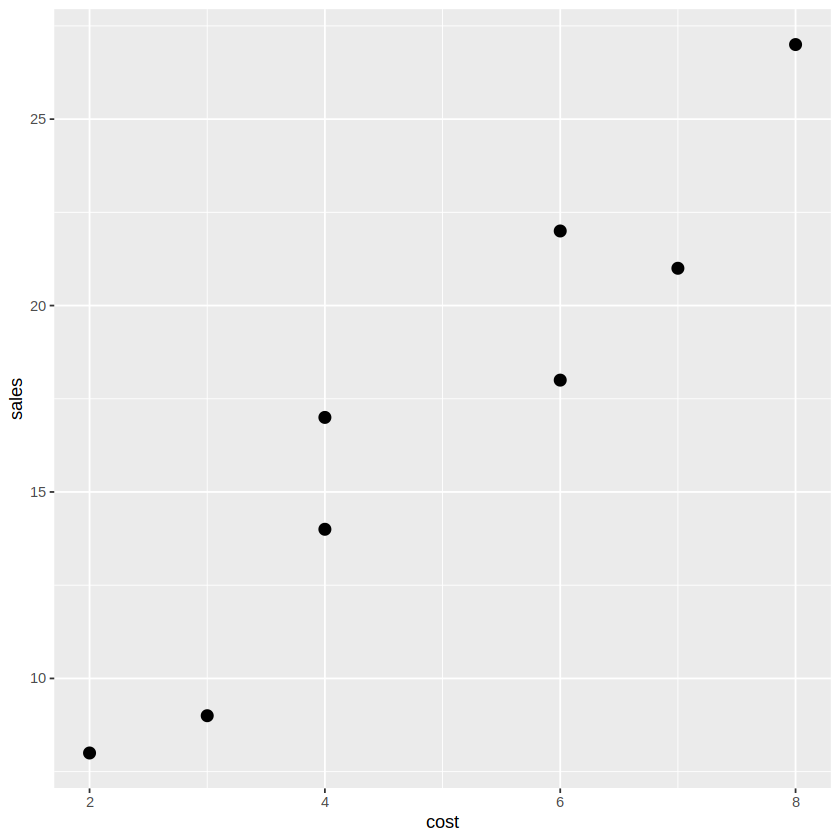

In [7]:
p <- ggplot(df, aes(cost, sales))
p + geom_point(size = 3)

In [8]:
cor.test(df$cost, df$sales)


	Pearson's product-moment correlation

data:  df$cost and df$sales
t = 7.8935, df = 6, p-value = 0.0002192
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7657768 0.9920691
sample estimates:
      cor 
0.9550718 


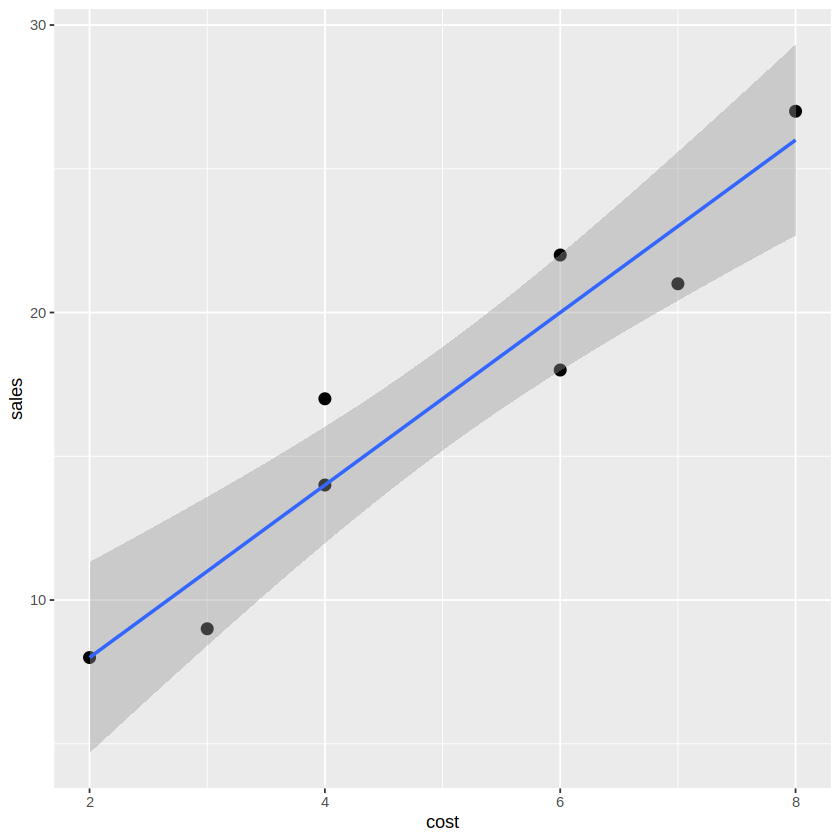

In [9]:
p <- ggplot(df, aes(cost, sales))
p + geom_point(size = 3) + geom_smooth(method = 'lm', formula = 'y~x')

In [10]:
reg <- lm(sales ~ cost, data = df)

reg


Call:
lm(formula = sales ~ cost, data = df)

Coefficients:
(Intercept)         cost  
          2            3  


In [11]:
summary(reg)


Call:
lm(formula = sales ~ cost, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -2.00  -2.00   0.00   1.25   3.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0000     2.0378   0.981 0.364281    
cost          3.0000     0.3801   7.894 0.000219 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.082 on 6 degrees of freedom
Multiple R-squared:  0.9122,	Adjusted R-squared:  0.8975 
F-statistic: 62.31 on 1 and 6 DF,  p-value: 0.0002192


In [12]:
reg$coefficients

(Intercept)        cost 
          2           3

In [13]:
reg$fitted.values

1  2  3  4  5  6  7  8 
 8 11 20 14 23 14 26 20

In [14]:
reg$residuals

1             2             3             4             5 
-6.328271e-15 -2.000000e+00 -2.000000e+00  3.000000e+00 -2.000000e+00 
            6             7             8 
 3.023846e-15  1.000000e+00  2.000000e+00

In [15]:
df$fitted <- reg$fitted.values
df$residuals <- reg$residuals
df

cost,sales,fitted,residuals
<dbl>,<dbl>,<dbl>,<dbl>
2,8,8,-6.328271e-15
3,9,11,-2.000000e+00
6,18,20,-2.000000e+00
4,17,14,3.000000e+00
7,21,23,-2.000000e+00
4,14,14,3.023846e-15
8,27,26,1.000000e+00
6,22,20,2.000000e+00


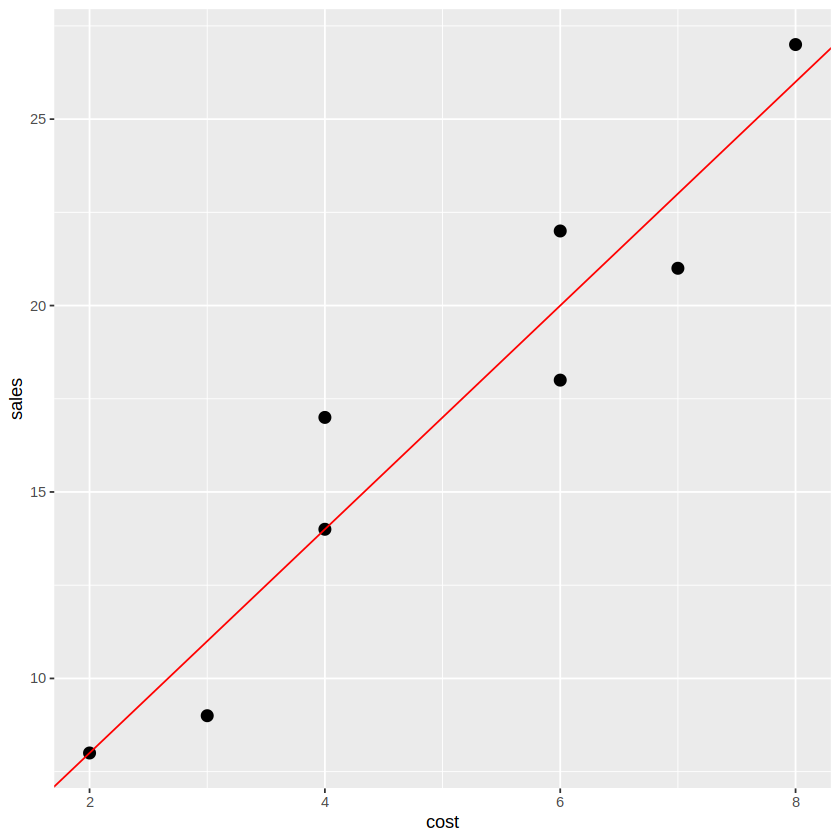

In [16]:
p <- ggplot(df, aes(cost, sales))
p <- p + geom_point(size = 3) + geom_abline(intercept = reg$coefficients[1], slope = reg$coefficients[2], color = 'red')
p

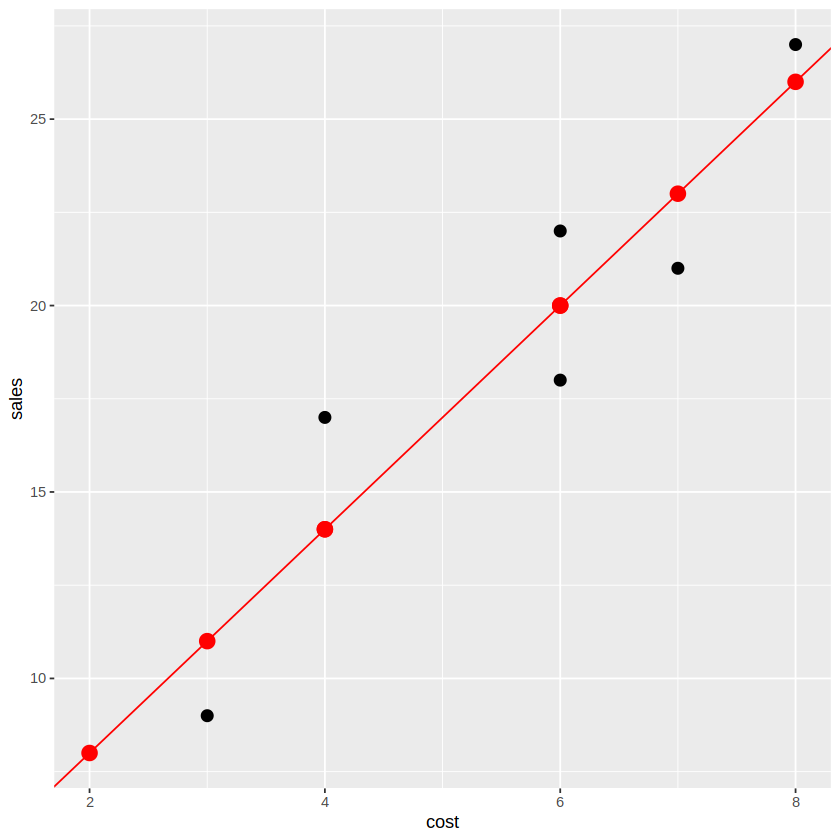

In [17]:
p <- ggplot(df, aes(cost))
p <- p + geom_point(aes(y = sales), size = 3)
p <- p + geom_point(aes(y = fitted), color='red', size = 4) + geom_abline(intercept = reg$coefficients[1], slope = reg$coefficients[2], color = 'red')

p

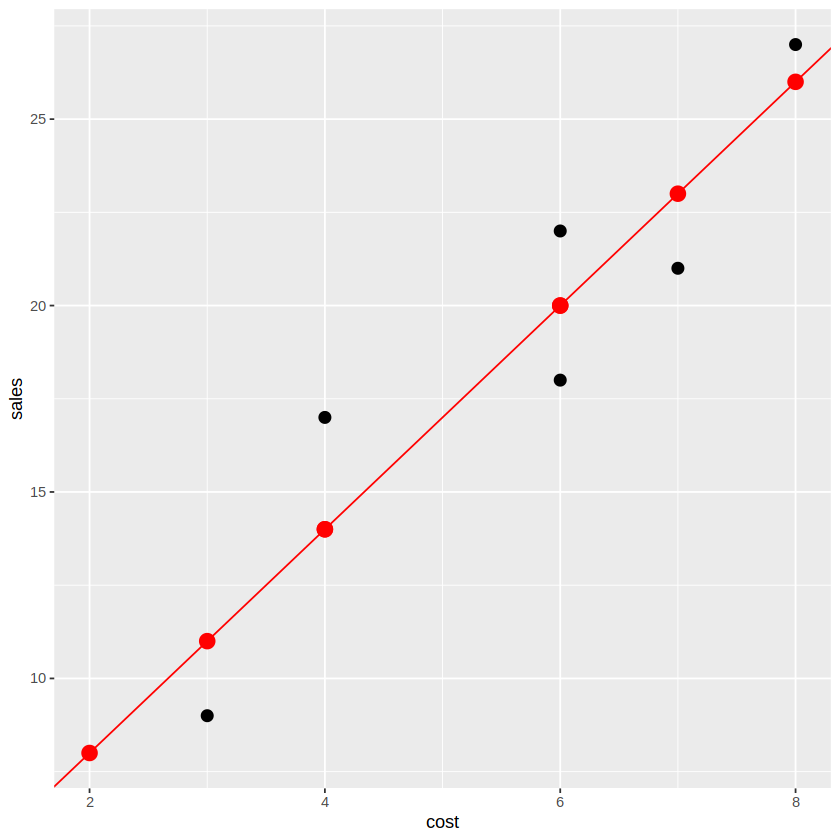

In [18]:
p <- ggplot(df, aes(cost))
p <- p + geom_point(aes(y = sales), size = 3)
p + geom_point(aes(y = fitted), color = 'red', size=4) +
  geom_abline(intercept = reg$coefficients[1], slope = reg$coefficients[2], color = 'red')

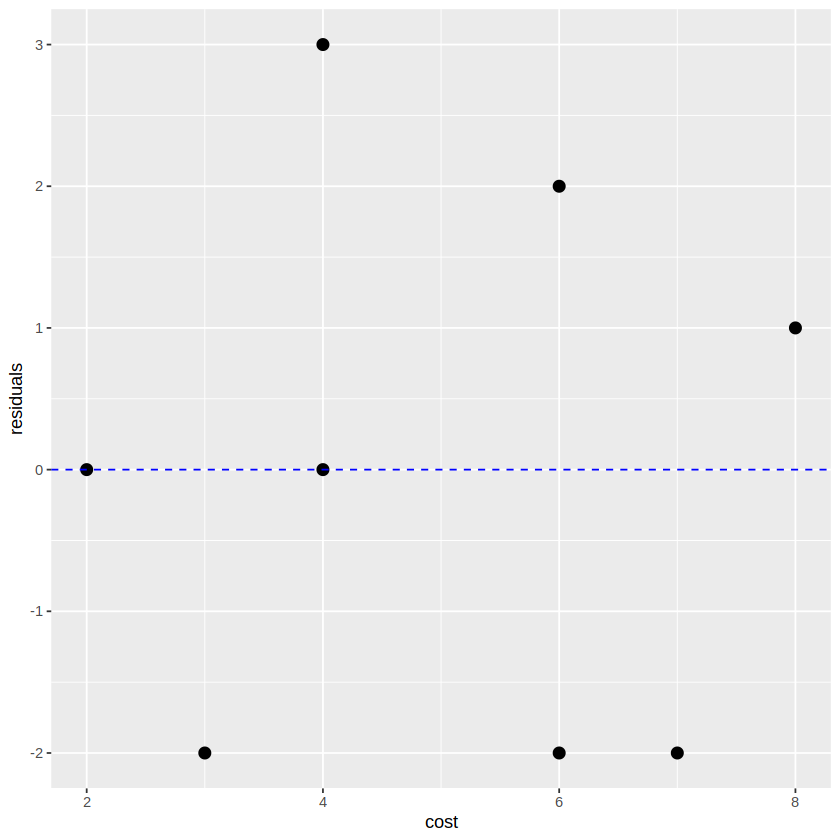

In [19]:
p <- ggplot(df, aes(cost, residuals))
p + geom_point(size=3) + geom_hline(yintercept = 0, color = 'blue', linetype = 2)

In [20]:
x <- data.frame(cost=1:10)
x$predict <- predict(reg, x)
x

cost,predict
<int>,<dbl>
1,5
2,8
3,11
4,14
5,17
6,20
7,23
8,26
9,29


In [21]:
reg2 <- lm(df$sales~ df$cost)
summary(reg2)


Call:
lm(formula = df$sales ~ df$cost)

Residuals:
   Min     1Q Median     3Q    Max 
 -2.00  -2.00   0.00   1.25   3.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0000     2.0378   0.981 0.364281    
df$cost       3.0000     0.3801   7.894 0.000219 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.082 on 6 degrees of freedom
Multiple R-squared:  0.9122,	Adjusted R-squared:  0.8975 
F-statistic: 62.31 on 1 and 6 DF,  p-value: 0.0002192


In [22]:
predict(reg2, x)

Warning message:
“'newdata' had 10 rows but variables found have 8 rows”


1  2  3  4  5  6  7  8 
 8 11 20 14 23 14 26 20

In [23]:
list.files("./../data")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "hw2-2기말성적예측-2022.xlsx"                          
 [8] "merge.xlsx"                                           
 [9] "naver_news(건국대 글로컬).txt"                        
[10] "sample-CP949.csv"                                     
[11] "sample-UTF8.csv"                                      
[12] "sample.xlsx"                                          
[13] "score.xlsx"                                           
[14] "경기도 화성시_관광통계_20231025.csv"                  
[15] "고속터미널-23-05.xlsx"                                
[16] "네이버블로그(충주맛집).txt"                           
[17] "데이터과학-중간고사.xlsx"                             
[18] "실습 설문지.xlsx"                                     
[19] "중고차시세.xlsx"                                      
[20] "화재-피해액.xlsx"

In [24]:
library(readxl)

data <- read_xlsx("./../data/hw2-2기말성적예측-2022.xlsx")
data

no,중간,기말
<dbl>,<dbl>,<dbl>
1,22.0,26
2,26.0,33
3,33.0,41
4,37.5,38
5,38.0,42
6,38.0,52
7,39.0,28
8,40.0,27
9,43.5,52


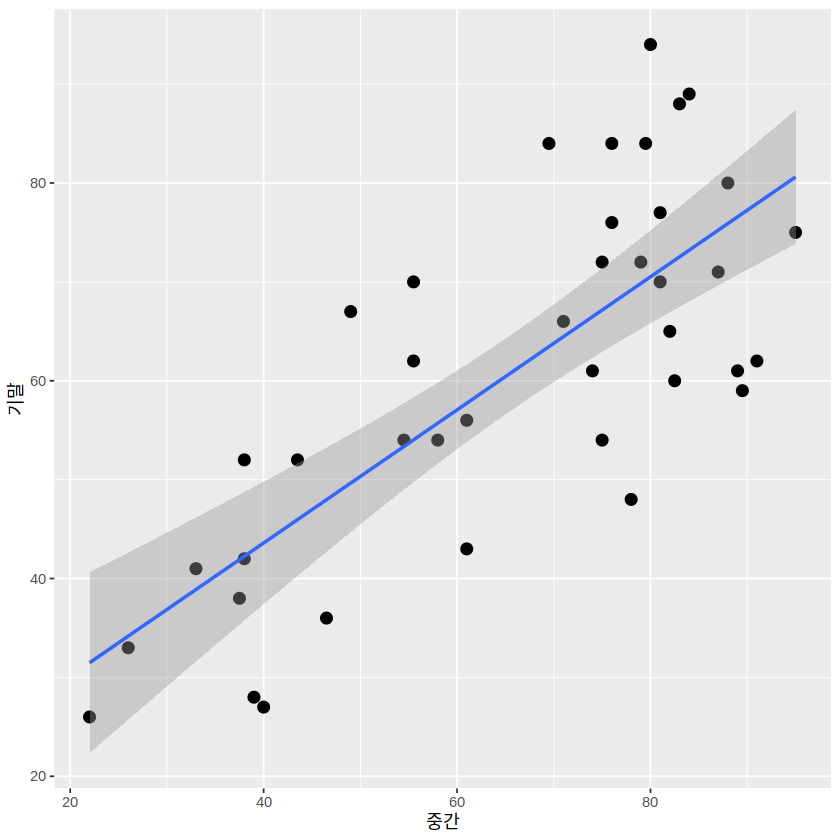

In [25]:
p <- ggplot(data, aes(중간, 기말))
p + geom_point(size=3) + geom_smooth(method='lm', formula='y~x')

In [26]:
reg <- lm(기말 ~ 중간, data = data)
reg


Call:
lm(formula = 기말 ~ 중간, data = data)

Coefficients:
(Intercept)         중간  
    16.6804       0.6729  


In [27]:
x <- data.frame(중간=seq(30,90,10))
x$predict <- predict(reg, x)
x

중간,predict
<dbl>,<dbl>
30,36.86847
40,43.59784
50,50.32720
60,57.05656
70,63.78592
80,70.51528
90,77.24464


In [28]:
x <- seq(30, 90, 10)
mid_avg <- mean(data$중간)
mid_sd <- sd(data$중간)

z_score <- (x - mid_avg)/mid_sd

In [29]:
final_avg <- mean(data$기말)
final_sd <- sd(data$기말)

predict <- z_score*final_sd + final_avg

data.frame(x=x, predict=predict)

x,predict
<dbl>,<dbl>
30,29.23092
40,38.10566
50,46.98040
60,55.85514
70,64.72989
80,73.60463
90,82.47937


In [30]:
carsales <- read_xlsx("./../data/중고차시세.xlsx")
head(carsales)

거리,가격
<dbl>,<dbl>
26839,1800
28000,1870
29000,1840
30000,1890
30000,1790
30902,1920


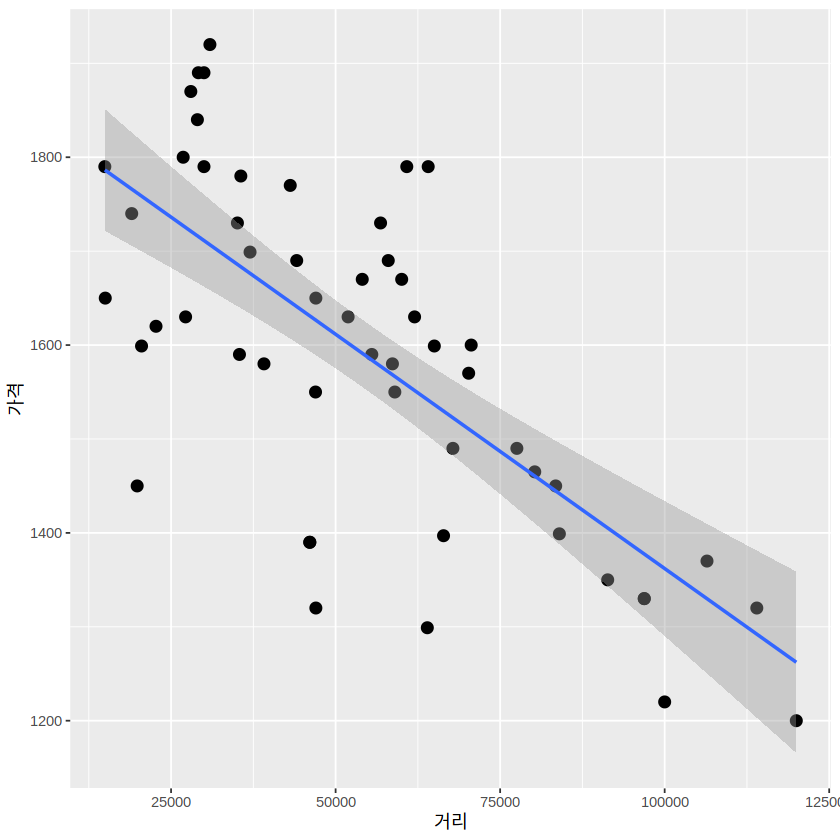

In [31]:
p <- ggplot(carsales, aes(거리, 가격))
p + geom_point(size=3) + geom_smooth(method='lm', formula='y~x')

In [32]:
cor(carsales)

,거리,가격
거리,1.0000000,-0.7120594
가격,-0.7120594,1.0000000


In [33]:
reg <- lm(가격 ~ 거리, data=carsales)
summary(reg)


Call:
lm(formula = 가격 ~ 거리, data = carsales)

Residuals:
    Min      1Q  Median      3Q     Max 
-311.93  -73.09   13.76   78.71  248.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.861e+03  4.123e+01  45.141  < 2e-16 ***
거리        -4.990e-03  6.823e-04  -7.313 1.57e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.2 on 52 degrees of freedom
Multiple R-squared:  0.507,	Adjusted R-squared:  0.4975 
F-statistic: 53.48 on 1 and 52 DF,  p-value: 1.567e-09


In [34]:
reg$coefficients

(Intercept)          거리 
 1.860970e+03 -4.989512e-03

In [35]:
carsales$fitted <- reg$fitted.values

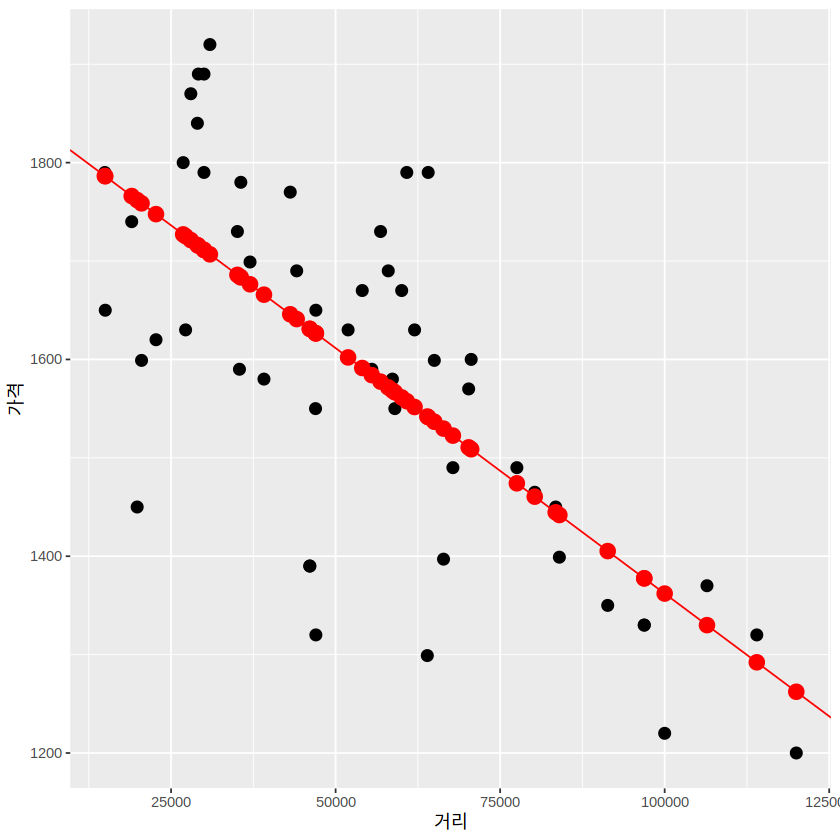

In [36]:
p <- ggplot(carsales, aes(거리))
p <- p + geom_point(aes(y = 가격), size = 3)
p + geom_point(aes(y = fitted), color = 'red', size = 4)+
  geom_abline(intercept = reg$coefficients[1], slope = reg$coefficients[2], color = 'red')

In [37]:
x <- data.frame(거리 = seq(30000,150000,10000))
x$predict <- predict(reg, x)
x

거리,predict
<dbl>,<dbl>
30000,1711.284
40000,1661.389
50000,1611.494
60000,1561.599
70000,1511.704
80000,1461.809
90000,1411.914
100000,1362.019
110000,1312.123


In [38]:
help(women)

women                 package:datasets                 R Documentation

_A_v_e_r_a_g_e _H_e_i_g_h_t_s _a_n_d _W_e_i_g_h_t_s _f_o_r _A_m_e_r_i_c_a_n _W_o_m_e_n

_D_e_s_c_r_i_p_t_i_o_n:

     This data set gives the average heights and weights for American
     women aged 30-39.

_U_s_a_g_e:

     women
     
_F_o_r_m_a_t:

     A data frame with 15 observations on 2 variables.

       ‘[,1]’  ‘height’  numeric  Height (in)  
       ‘[,2]’  ‘weight’  numeric  Weight (lbs) 
      
_D_e_t_a_i_l_s:

     The data set appears to have been taken from the American Society
     of Actuaries _Build and Blood Pressure Study_ for some (unknown to
     us) earlier year.

     The World Almanac notes: “The figures represent weights in
     ordinary indoor clothing and shoes, and heights with shoes”.

_S_o_u_r_c_e:

     The World Almanac and Book of Facts, 1975.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(graphics)
     plot(women, xlab = "Height (in)", ylab = "Weight (lb)",
          main = "women data: American women aged 30-39")

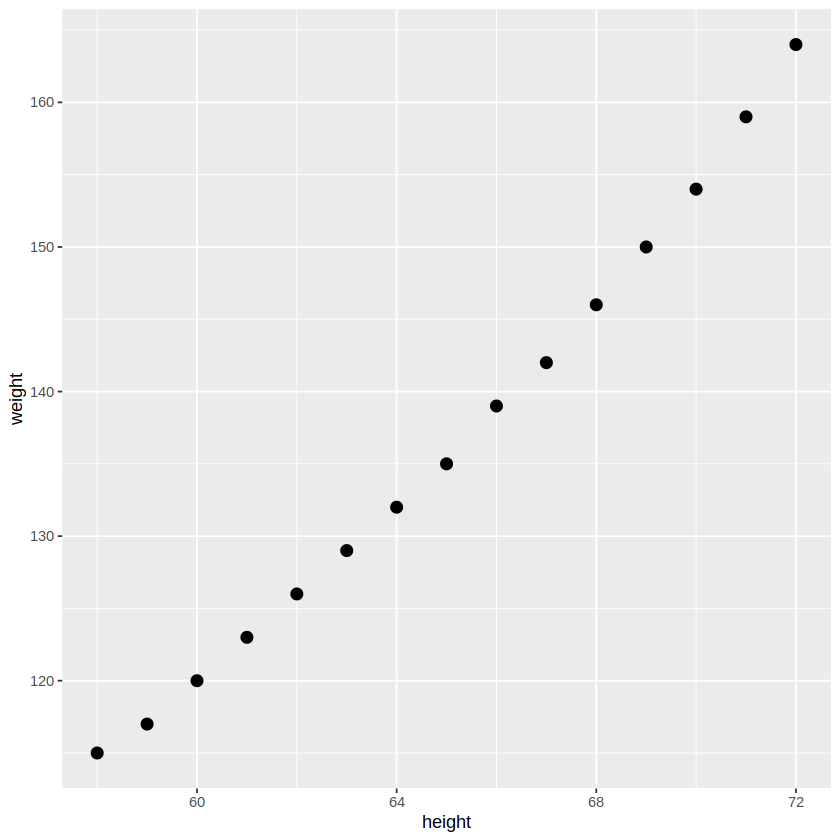

In [39]:
p <- ggplot(women, aes(height, weight))
p + geom_point(size = 3)

In [40]:
cor(women)

,height,weight
height,1.0000000,0.9954948
weight,0.9954948,1.0000000


In [41]:
reg <- lm(weight ~ height, data = women)
summary(reg)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


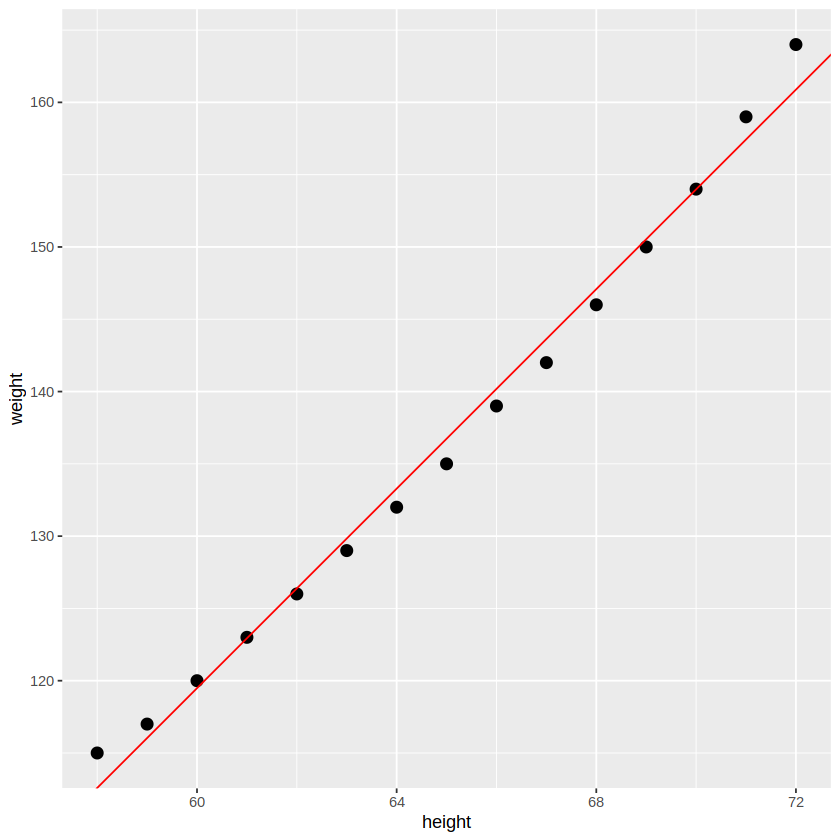

In [42]:
p <- ggplot(women, aes(height, weight))
p + geom_point(size = 3) + geom_abline(intercept = reg$coefficients[1],
      slope = reg$coefficients[2], color = 'red')

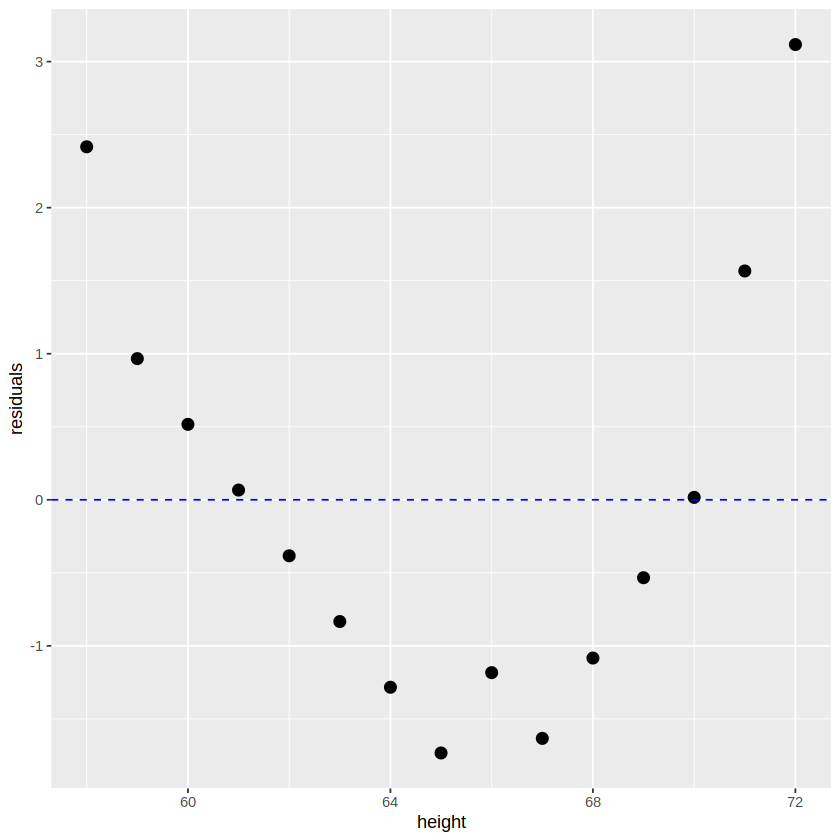

In [43]:
women$residuals <- reg$residuals

p <- ggplot(women, aes(height, residuals))
p + geom_point(size = 3) + geom_hline(yintercept = 0, color = 'blue', linetype = 2)

In [44]:
reg2 <- lm(weight ~ height + I(height^2), data = women)
summary(reg2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


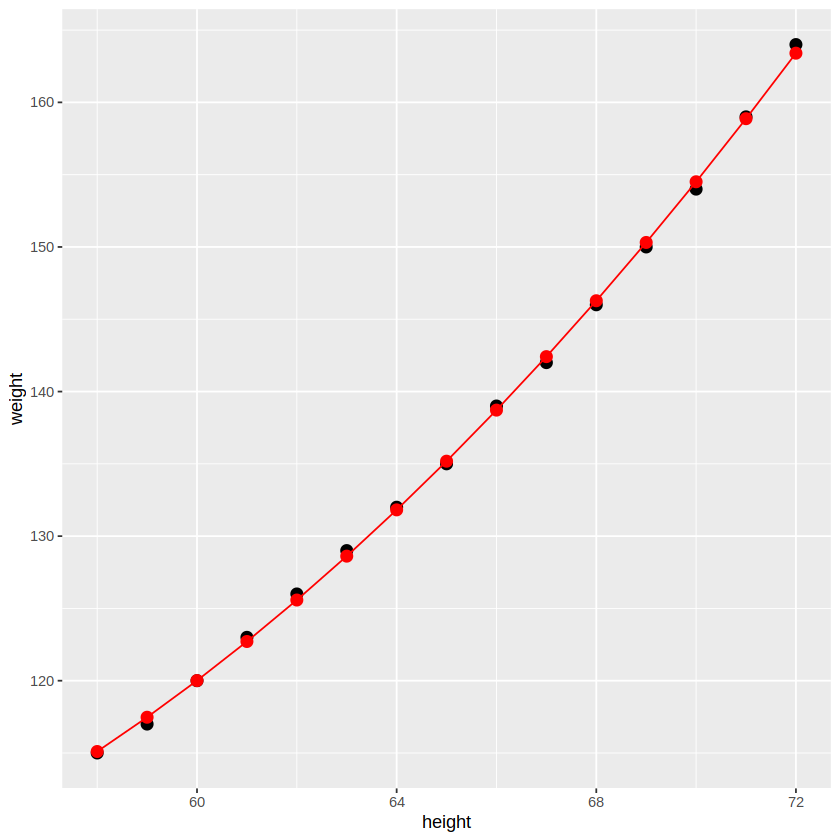

In [45]:
women$fitted <- reg2$fitted.values

p <- ggplot(women, aes(height)) 
p <- p + geom_point(aes(y = weight), size = 3)
p <- p + geom_point(aes(y = fitted), color = 'red', size = 3)
p <- p + geom_line(aes(y = fitted), color = 'red')
p

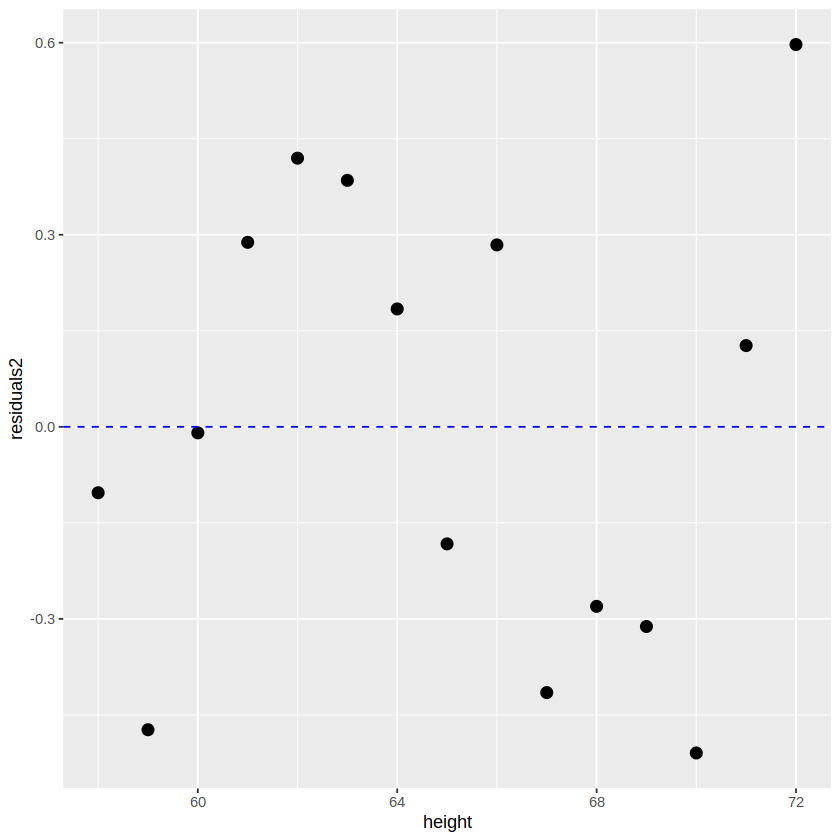

In [46]:
women$residuals2 <- reg2$residuals

p <- ggplot(women, aes(height, residuals2))
p + geom_point(size = 3) + geom_hline(yintercept = 0, color = 'blue', linetype = 2)

In [47]:
result <- cor(mtcars)
round(result, 2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


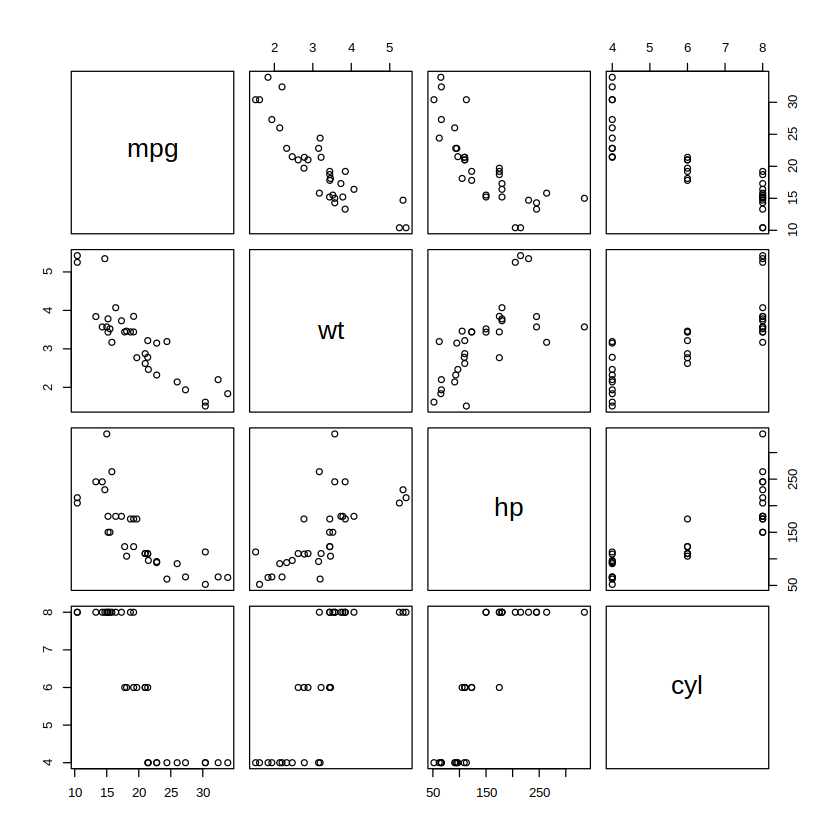

In [48]:
pairs(mpg ~ wt + hp + cyl, data = mtcars)

In [49]:
reg <- lm(mpg ~ ., data = mtcars)
summary(reg)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

In [50]:
library(car)

Loading required package: carData



In [51]:
print(round(sqrt(vif(reg)),2))

 cyl disp   hp drat   wt qsec   vs   am gear carb 
3.92 4.65 3.14 1.84 3.89 2.74 2.23 2.16 2.31 2.81 


In [52]:
print(sqrt(vif(reg)) > 2)

  cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb 
 TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 


In [53]:
reg2 <- lm(mpg ~. , data = mtcars)
step(reg2, directions = 'backward')

Start:  AIC=70.9
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- cyl   1    0.0799 147.57 68.915
- vs    1    0.1601 147.66 68.932
- carb  1    0.4067 147.90 68.986
- gear  1    1.3531 148.85 69.190
- drat  1    1.6270 149.12 69.249
- disp  1    3.9167 151.41 69.736
- hp    1    6.8399 154.33 70.348
- qsec  1    8.8641 156.36 70.765
<none>              147.49 70.898
- am    1   10.5467 158.04 71.108
- wt    1   27.0144 174.51 74.280

Step:  AIC=68.92
mpg ~ disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- vs    1    0.2685 147.84 66.973
- carb  1    0.5201 148.09 67.028
- gear  1    1.8211 149.40 67.308
- drat  1    1.9826 149.56 67.342
- disp  1    3.9009 151.47 67.750
- hp    1    7.3632 154.94 68.473
<none>              147.57 68.915
- qsec  1   10.0933 157.67 69.032
- am    1   11.8359 159.41 69.384
- wt    1   27.0280 174.60 72.297

Step:  AIC=66.97
mpg ~ disp + hp + drat + wt + qsec + am


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Coefficients:
(Intercept)           wt         qsec           am  
      9.618       -3.917        1.226        2.936  


In [54]:
reg_f <- lm(mpg ~ wt + qsec + am, data = mtcars)
summary(reg_f)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


In [55]:
print(round(sqrt(vif(reg_f)),2))

  wt qsec   am 
1.58 1.17 1.59 
